In [106]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

In [107]:
fname = 'data/covid_data_train.csv'
df = pd.read_csv(fname, sep=';')
list(df.columns)

['Unnamed: 0',
 'lat',
 'lng',
 'name',
 'population',
 'district',
 'subject',
 'density',
 'ivl_per_100k',
 'ivl_number',
 'ekmo_per_100k',
 'ekmo_number',
 'life_quality_place_rating',
 'ecology',
 'cleanness',
 'public_services',
 'neighbourhood',
 'children_places',
 'sport_and_outdoor',
 'shops_and_malls',
 'public_transport',
 'security',
 'life_costs',
 'infected_3003',
 'died_3003',
 'recovered_3003',
 'sick_3003',
 'infected_1503',
 'died_1503',
 'recovered_1503',
 'sick_1503',
 'inf_rate',
 'avg_temp_min',
 'avg_temp_max',
 'avg_temp_std',
 'avg_temp_median',
 'humidity_min',
 'humidity_max',
 'humidity_std',
 'humidity_median',
 'pressure_min',
 'pressure_max',
 'pressure_std',
 'pressure_median',
 'wind_speed_ms_min',
 'wind_speed_ms_max',
 'wind_speed_ms_std',
 'wind_speed_ms_median',
 'region_x',
 'urban_50-54_years',
 'urban_55-59_years',
 'urban_60-64_years',
 'urban_65-69_years',
 'urban_70-74_years',
 'urban_75-79_years',
 'urban_80-84_years',
 'urban_85-89_years',
 

In [108]:
important_features = ['name', 'lng', 'ivl_number', 'volume_serv_post_2017', 'population', 'humidity_median', 
                      'ivl_per_100k', 'pressure_std', 'work_ratio_15-24_years', 'density']
X = df[important_features].dropna()
X.head()

,name,lng,ivl_number,volume_serv_post_2017,population,humidity_median,ivl_per_100k,pressure_std,work_ratio_15-24_years,density
2,Абдулино,53.655701,542.0,358862.30,20663.0,85.29,27.7,8.391038,23.2,15.95
3,Абинск,38.157819,1000.0,2281604.00,34926.0,67.43,17.6,3.166792,23.5,73.73
4,Агрыз,52.997251,1100.0,394884.40,19299.0,76.86,28.2,8.129898,29.4,57.27
5,Азнакаево,53.079228,1100.0,394884.40,34859.0,76.86,28.2,8.129898,29.4,57.27
6,Азов,39.424075,643.0,1119143.29,82882.0,66.43,15.3,3.638419,25.0,41.87


In [109]:
from sklearn import preprocessing

XX = X.drop(['name'], axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(XX)


knn experiment

In [110]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X_scaled)

In [111]:
town = X.loc[X.name == 'Абинск']
print(town)
x = town[important_features].drop(['name'], axis=1)
x = x.values.flatten().tolist()


     name        lng  ivl_number  volume_serv_post_2017  population  \
3  Абинск  38.157819      1000.0              2281604.0     34926.0   

   humidity_median  ivl_per_100k  pressure_std  work_ratio_15-24_years  \
3            67.43          17.6      3.166792                    23.5   

   density  
3    73.73  


In [112]:
_, towns = nbrs.kneighbors([x], 5)
towns

array([[ 26, 176, 311, 327,  17]])

In [113]:
X.iloc[towns[0]]

,name,lng,ivl_number,volume_serv_post_2017,population,humidity_median,ivl_per_100k,pressure_std,work_ratio_15-24_years,density
31,Армавир,41.129406,1000.0,2281604.0,188897.0,67.43,17.6,3.166792,23.5,73.73
218,Ейск,38.274768,1000.0,2281604.0,87771.0,67.43,17.6,3.166792,23.5,73.73
389,Кропоткин,40.575027,1000.0,2281604.0,80743.0,67.43,17.6,3.166792,23.5,73.73
411,Лабинск,40.724218,1000.0,2281604.0,62822.0,67.43,17.6,3.166792,23.5,73.73
21,Анапа,37.316887,1000.0,2281604.0,58983.0,67.43,17.6,3.166792,23.5,73.73


In [114]:
len(X)

352

TSNE visualization 

In [115]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', random_state=10).fit_transform(X_scaled)
X_embedded.shape

(352, 2)

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

X['tsne_0'] = X_embedded[:, 0]
X['tsne_1'] = X_embedded[:, 1]
X['inf_rate'] = df['inf_rate']

Как будто видны какие-то кластеры

<AxesSubplot:xlabel='tsne_0', ylabel='tsne_1'>

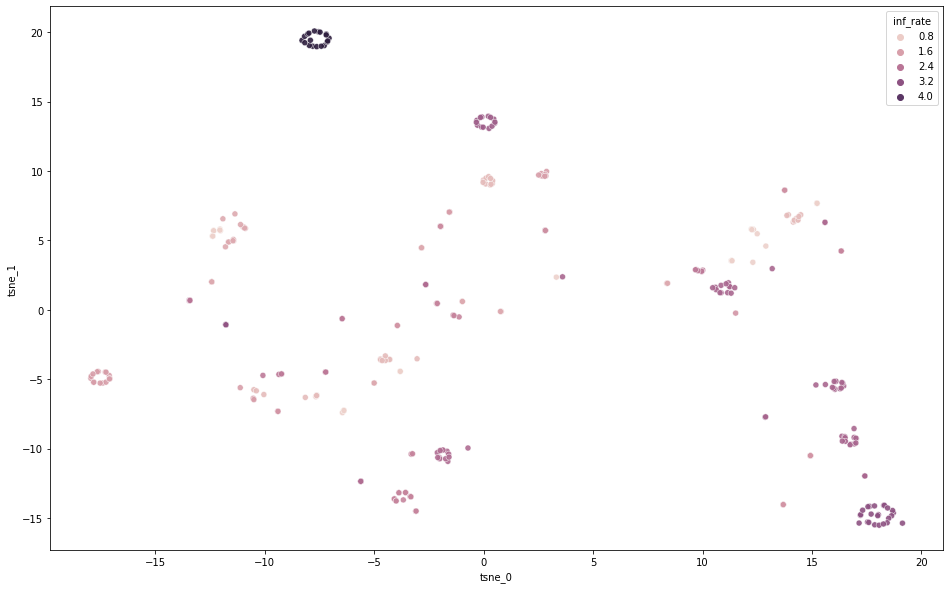

In [121]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_0", y="tsne_1",    
    data=X,    
    hue="inf_rate",
    alpha=0.9
)

<AxesSubplot:xlabel='tsne_0', ylabel='tsne_1'>

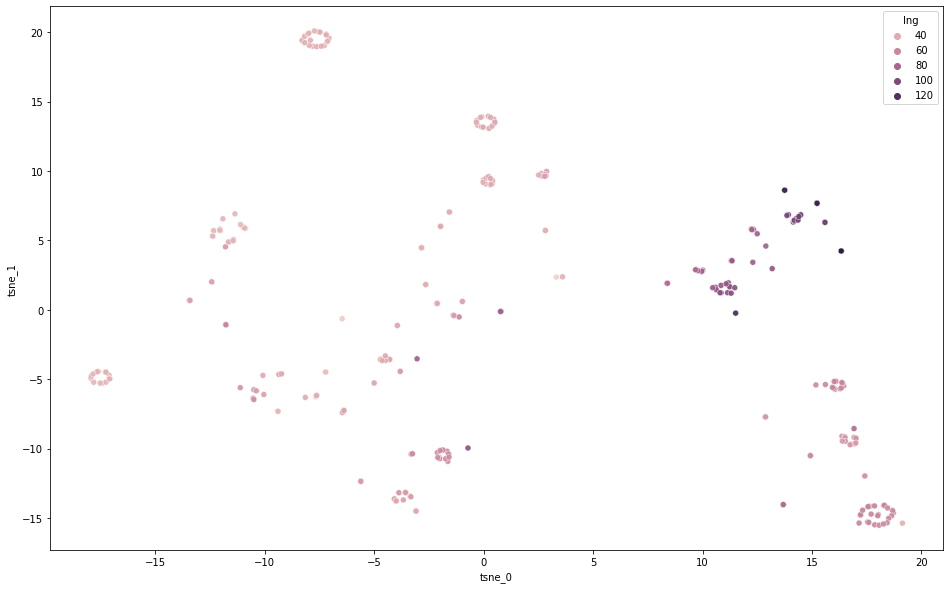

In [118]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_0", y="tsne_1",    
    data=X,    
    hue="lng",
    alpha=0.9
)

<AxesSubplot:xlabel='tsne_0', ylabel='tsne_1'>

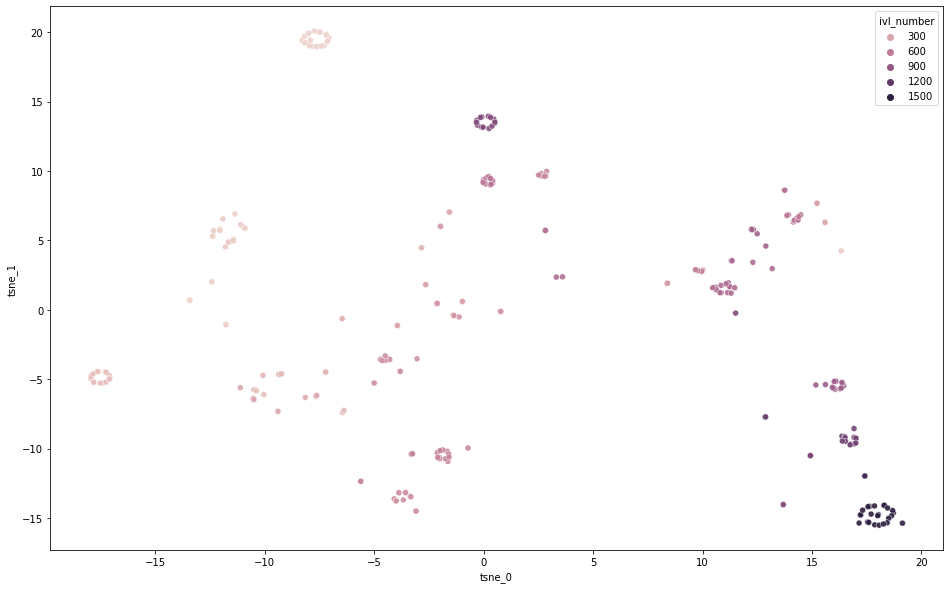

In [119]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_0", y="tsne_1",    
    data=X,    
    hue="ivl_number",
    alpha=0.9
)